In [1]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [2]:
import os
from bertopic import BERTopic
from docx import Document
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
import gensim

## **Choosing the folder/subject**

In [3]:
os.chdir("../theory/Networking")

## **Importing Models**

In [4]:
model_no_len = BERTopic.load("model_cpu_no_len")

In [5]:
model_ngram = BERTopic.load("model_ngram_no_len")

In [6]:
model_corr = BERTopic.load("model_corr_ngram_no_len")

## **Getting Acronyms**

In [7]:
acronym_no_len = {}
tp = model_no_len.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_no_len[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   9117   :   -1_time_bit_packet_error
0   :   609   :   0_telephone_phone_mobile_voice
1   :   248   :   1_dns_domain_record_query
2   :   199   :   2_site_web_search_unpopular
3   :   189   :   3_band_ghz_frequency_spectrum
4   :   185   :   4_frame_acknowledgement_sender_lost
5   :   180   :   5_alice_bob_ra_rb
6   :   177   :   6_browser_page_plug_dynamic
7   :   176   :   7_collision_slot_station_probability
8   :   172   :   8_connection_syn_fin_handshake
9   :   137   :   9_satellite_orbit_earth_iridium
10   :   134   :   10_html_xml_style_sheet
11   :   129   :   11_service_connectionless_transport_oriented
12   :   126   :   12_rfid_tag_reader_epc
13   :   120   :   13_cipher_ciphertext_block_plaintext
14   :   116   :   14_cache_caching_proxy_cached
15   :   114   :   15_protocol_scenario_solving_fail
16   :   97   :   16_adsl_modem_dsl_cable
17   :   93   :   17_agent_mailbox_mail_transfer
18   :   93   :   18_duplicate_lost_lifetime_packet
19   :   87   :   19_urity_u

In [8]:
acronym_ngram = {}
tp = model_ngram.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_ngram[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   9117   :   -1_bit_time_packet_network
0   :   609   :   0_telephone_mobile_phone_voice
1   :   248   :   1_dns_domain_record_query
2   :   199   :   2_web_site_internet_web site
3   :   189   :   3_band_frequency_spectrum_ghz
4   :   185   :   4_frame_acknowledgement_sender_acknowledgement frame
5   :   180   :   5_alice_bob_ra_session
6   :   177   :   6_browser_page_plug_web page
7   :   176   :   7_collision_slot_station_probability
8   :   172   :   8_connection_syn_way handshake_fin
9   :   137   :   9_satellite_orbit_earth_communication satellite
10   :   134   :   10_html_xml_style_tag
11   :   129   :   11_service_transport service_transport_connectionless
12   :   126   :   12_rfid_tag_reader_rfid tag
13   :   120   :   13_cipher_ciphertext_block_plaintext
14   :   116   :   14_cache_caching_proxy_cached
15   :   114   :   15_protocol_protocol protocol_use protocol_new protocol
16   :   97   :   16_adsl_modem_dsl_cable
17   :   93   :   17_agent_user agent_transfer ag

In [9]:
acronym_corr = {}
tp = model_corr.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym_corr[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   9147   :   -1_network_time_frame_packet
0   :   424   :   0_alice_bob_key_session
1   :   377   :   1_error_bit_code_parity
2   :   217   :   2_route_path_routing_shortest path
3   :   208   :   3_bridge_port_vlan_lan
4   :   199   :   4_congestion_congestion control_control_loss
5   :   197   :   5_dns_domain_record_dns server
6   :   174   :   6_band_frequency_spectrum_ghz
7   :   140   :   7_satellite_orbit_earth_communication satellite
8   :   134   :   8_mobile_phone_mobile phone_phone network
9   :   134   :   9_browser_page_plug_program
10   :   131   :   10_rfid_tag_reader_rfid tag
11   :   129   :   11_service_transport service_transport_connectionless
12   :   127   :   12_cipher_ciphertext_plaintext_block
13   :   122   :   13_cache_caching_proxy_cached
14   :   118   :   14_protocol_protocol protocol_new protocol_way protocol
15   :   104   :   15_telephone_telephone company_telephone network_bell
16   :   98   :   16_fiber_copper_optical_fiber optic
17   :   95   

## **Getting the Questions**

In [10]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [11]:
def get_ques_list():
    list_of_files = os.listdir()
    all_ques = []
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(" ", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques.extend(fullText)
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    return all_ques

In [12]:
ques_list = get_ques_list()
ques_list = [pp(ques) for ques in ques_list]   # for preprocessing question
for ques in ques_list:
    print(ques)

mean network topology
advantage distribute process
criteria check network reliability
different factor affect performance network
make network effective efficient
subnet mask work
difference tcp udp protocols use
explain osi model layer
purpose firewall work
nat network address translation work
vlan virtual local area network explain work
follow essential characteristics cloud host application reachable network base appliance demand self service broad network access resource pool rapid elasticity
follow type hardware virtualization guest software run isolate domains mention options emulation virtualization virtualization
follow paas characteristics define cloud service build virtualization technology provide variety service assist development test deployment apps integrate web service databases
data availability security service threaten follow type attack denial service attack masquerade modification message repudiation
give ip address belong follow ip class class class class class
fo

## **Predicting Topic using different model**

In [13]:
no_len_probab = []
no_len_topic = []

ngram_probab = []
ngram_topic = []

corr_probab = []
corr_topic = []

for ques in ques_list:
    number_of_topics = 1
    similar_topic, probab = model_no_len.find_topics(ques, top_n=number_of_topics)
    no_len_probab.append(round(probab[0], 2))
    no_len_topic.append(acronym_no_len[similar_topic[0]])
    
    similar_topic, probab = model_ngram.find_topics(ques, top_n=number_of_topics)
    ngram_probab.append(round(probab[0], 2))
    ngram_topic.append(acronym_no_len[similar_topic[0]])
    
    similar_topic, probab = model_corr.find_topics(ques, top_n=number_of_topics)
    corr_probab.append(round(probab[0], 2))
    corr_topic.append(acronym_no_len[similar_topic[0]])

# print(len(no_len_probab))
# print(len(no_len_topic))
# print()
# print(len(ngram_probab))
# print(len(ngram_topic))
# print()
# print(len(corr_probab))
# print(len(corr_topic))

## **Storing in CSV**

In [14]:
os.chdir("..")
os.chdir("..")
os.chdir("compare_model/compare_graph")

In [15]:
data = {
    'question': ques_list,
    'no_len_probab': no_len_probab,
    'no_len_topic': no_len_topic,
    'ngram_probab': ngram_probab,
    'ngram_topic': ngram_topic,
    'corr_probab': corr_probab,
    'corr_topic': corr_topic
}

In [16]:
df = pd.DataFrame.from_dict(data)

In [17]:
df.to_csv('net_compare.csv', index=False)

## **Extracting from CSV**

In [18]:
df = pd.read_csv('net_compare.csv')

In [19]:
'''Appending the average in the last'''
avg_no_len_probab = round(sum(no_len_probab) / len(no_len_probab), 2)
avg_ngram_probab = round(sum(ngram_probab) / len(ngram_probab), 2)
avg_corr_probab = round(sum(corr_probab) / len(corr_probab), 2)

# no_len_probab = pd.concat([no_len_probab, pd.Series([avg_no_len_probab])])
# ngram_probab = pd.concat([ngram_probab, pd.Series([avg_ngram_probab])])
# corr_probab = pd.concat([corr_probab, pd.Series([avg_corr_probab])])

# no_len_topic = pd.concat([no_len_topic, pd.Series(["average"])])
# ngram_topic = pd.concat([ngram_topic, pd.Series(["average"])])
# corr_topic = pd.concat([corr_topic, pd.Series(["average"])])

# ques_list = pd.concat([ques_list, pd.Series(["average"])])

average = ['average', avg_no_len_probab, 'average', avg_ngram_probab, 'average', avg_corr_probab, 'average']
df.loc[len(df)] = average

print(len(no_len_topic), " ", len(no_len_probab))
print(len(ngram_topic), " ", len(ngram_probab))
print(len(corr_topic), " ", len(corr_probab))
print(len(ques_list))

34   34
34   34
34   34
34


In [20]:
ques_list = df['question']

no_len_probab = df['no_len_probab']
no_len_topic = df['no_len_topic']

ngram_probab = df['ngram_probab']
ngram_topic = df['ngram_topic']

corr_probab = df['corr_probab']
corr_topic = df['corr_topic']

In [21]:
print(len(no_len_probab))
print(len(no_len_topic))
print()
print(len(ngram_probab))
print(len(ngram_topic))
print()
print(len(corr_probab))
print(len(corr_topic))
print()

print(type(ques_list))
print(ques_list)

35
35

35
35

35
35

<class 'pandas.core.series.Series'>
0                                 mean network topology
1                          advantage distribute process
2                    criteria check network reliability
3           different factor affect performance network
4                      make network effective efficient
5                                      subnet mask work
6                      difference tcp udp protocols use
7                               explain osi model layer
8                                 purpose firewall work
9                  nat network address translation work
10         vlan virtual local area network explain work
11    follow essential characteristics cloud host ap...
12    follow type hardware virtualization guest soft...
13    follow paas characteristics define cloud servi...
14    data availability security service threaten fo...
15    give ip address belong follow ip class class c...
16    follow type cyber attack email show image

## **Graph Compare**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

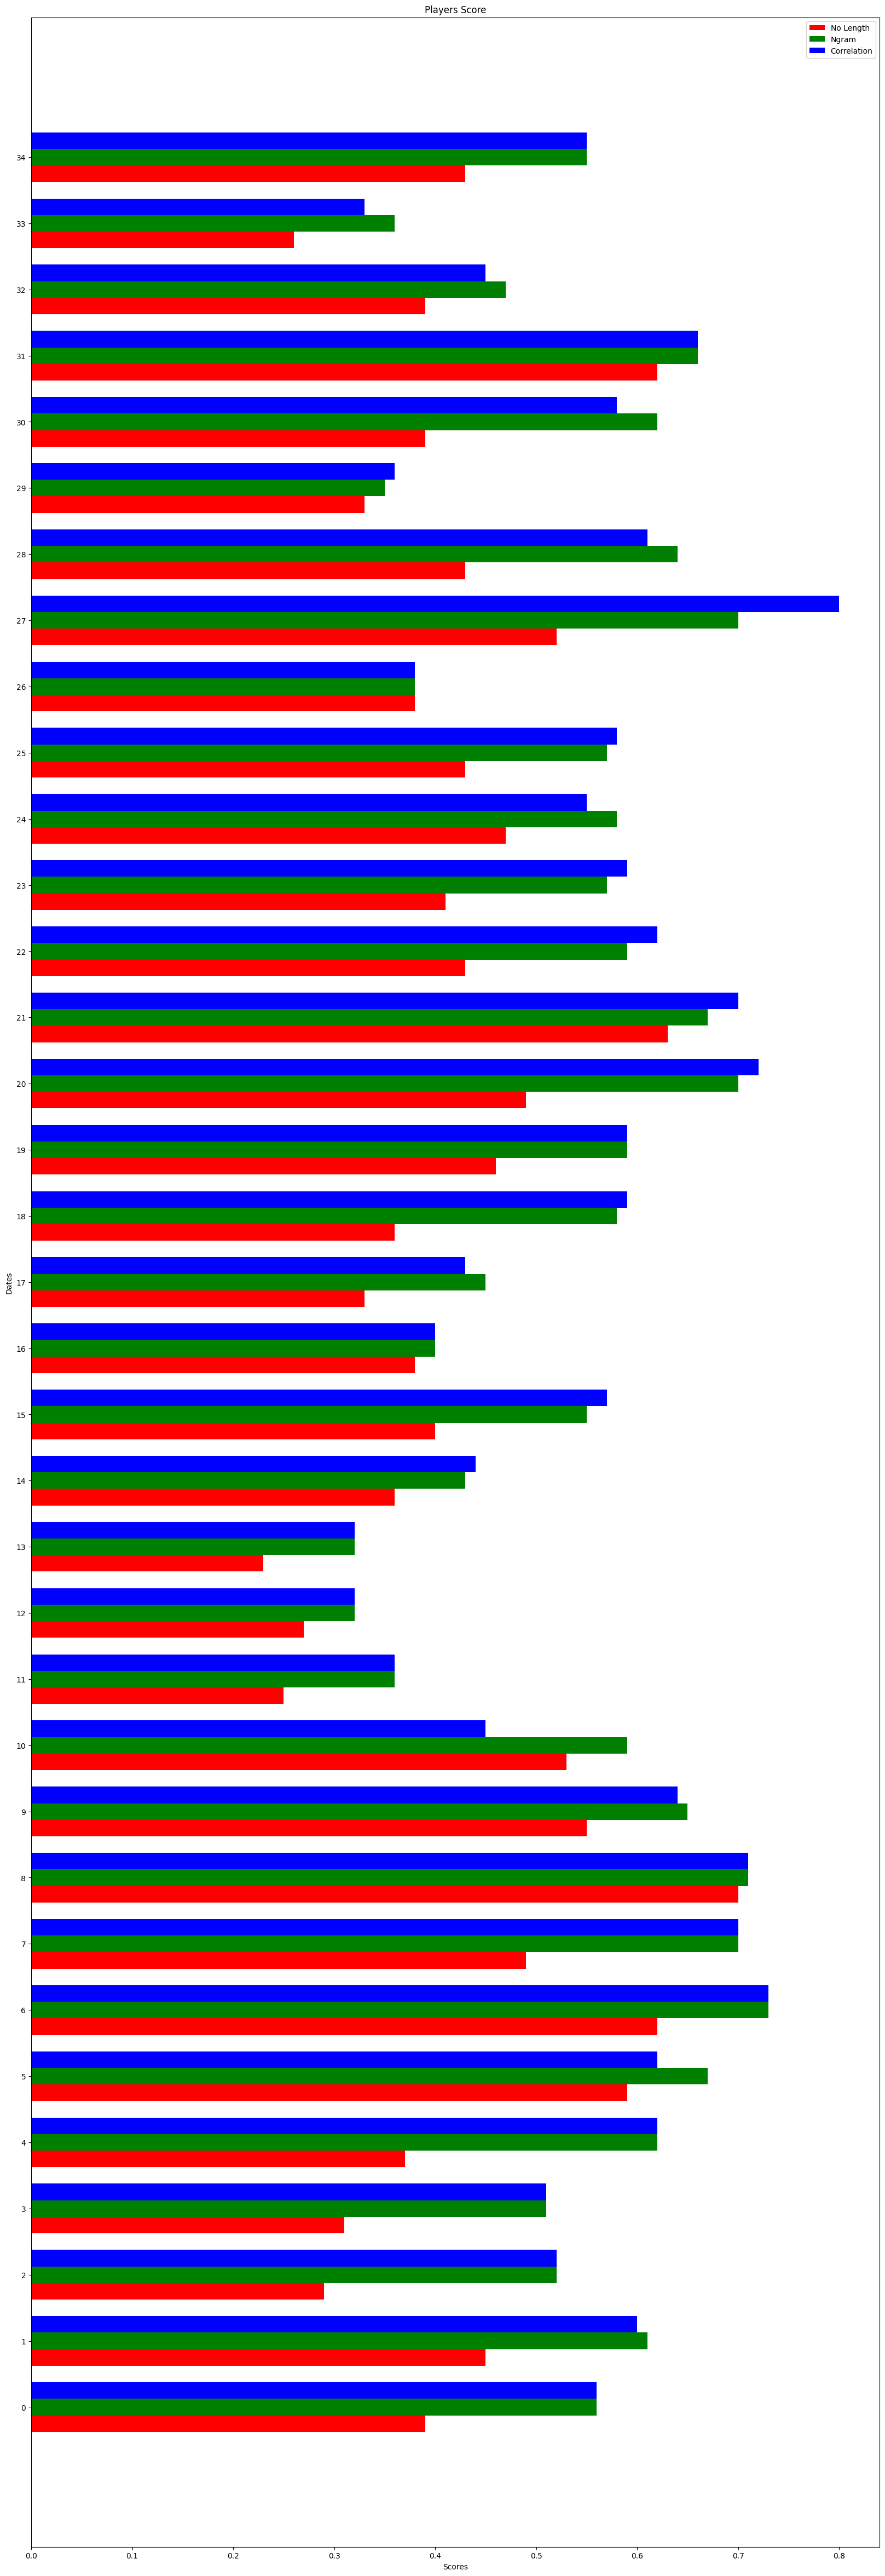

In [23]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

bar1 = plt.barh(ind, no_len_probab, width, color='r')

bar2 = plt.barh(ind+width, ngram_probab, width, color='g')

bar3 = plt.barh(ind+width*2, corr_probab, width, color='b')


plt.ylabel("Dates")
plt.xlabel('Scores')
plt.title("Players Score")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)
plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()


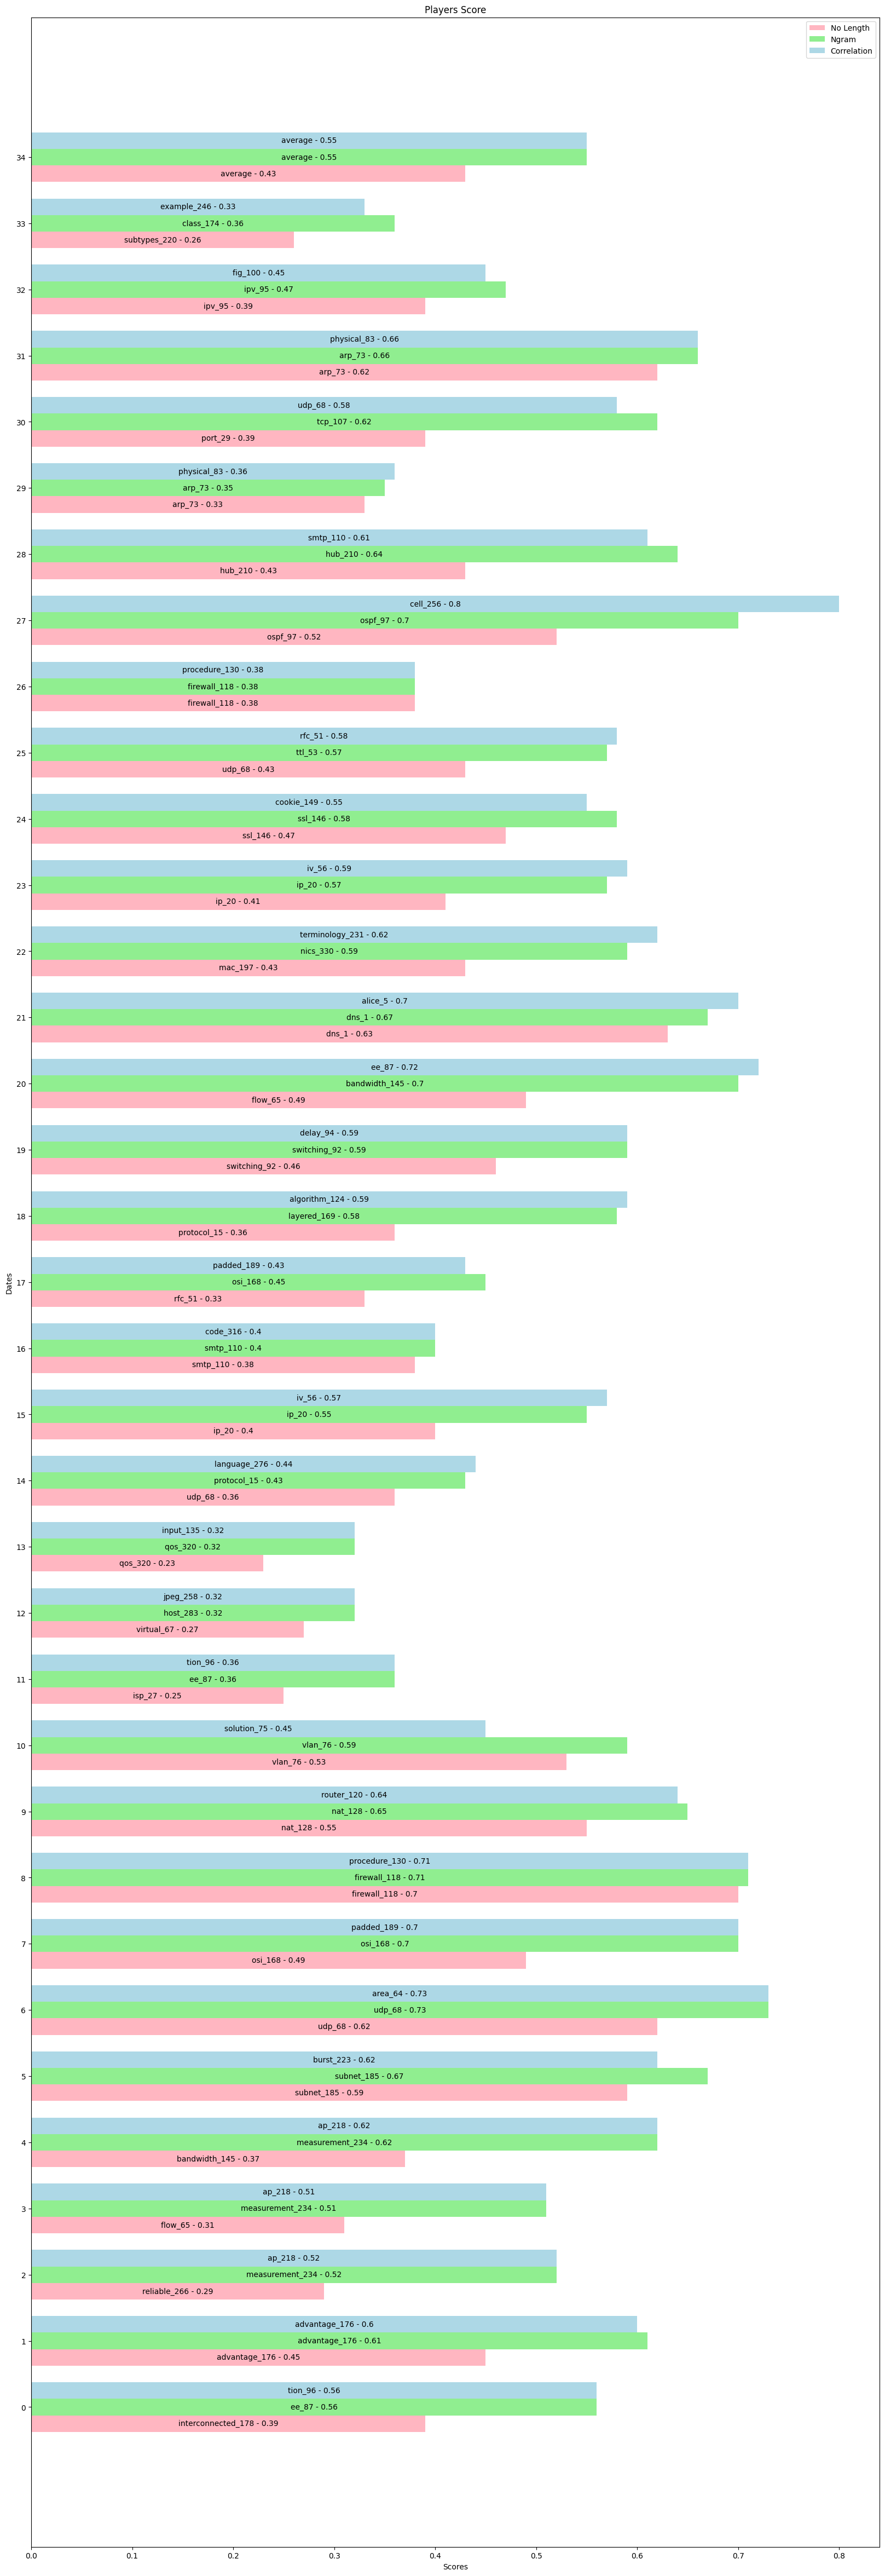

In [24]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

inside_bar1 = [str(no_len_topic[i]) + " - " + str(no_len_probab[i]) for i in range(len(ques_list))]
bar1 = plt.barh(ind, no_len_probab, width, color='#FFB6C1')
plt.bar_label(bar1, inside_bar1, label_type='center')

inside_bar2 = [str(ngram_topic[i]) + " - " + str(ngram_probab[i]) for i in range(len(ques_list))]
bar2 = plt.barh(ind+width, ngram_probab, width, color='#90EE90')
plt.bar_label(bar2, inside_bar2, label_type='center')

inside_bar3 = [str(corr_topic[i]) + " - " + str(corr_probab[i]) for i in range(len(ques_list))]
bar3 = plt.barh(ind+width*2, corr_probab, width, color='#ADD8E6')
plt.bar_label(bar3, inside_bar3, label_type='center')


plt.ylabel("Dates")
plt.xlabel('Scores')
plt.title("Players Score")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)

plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()

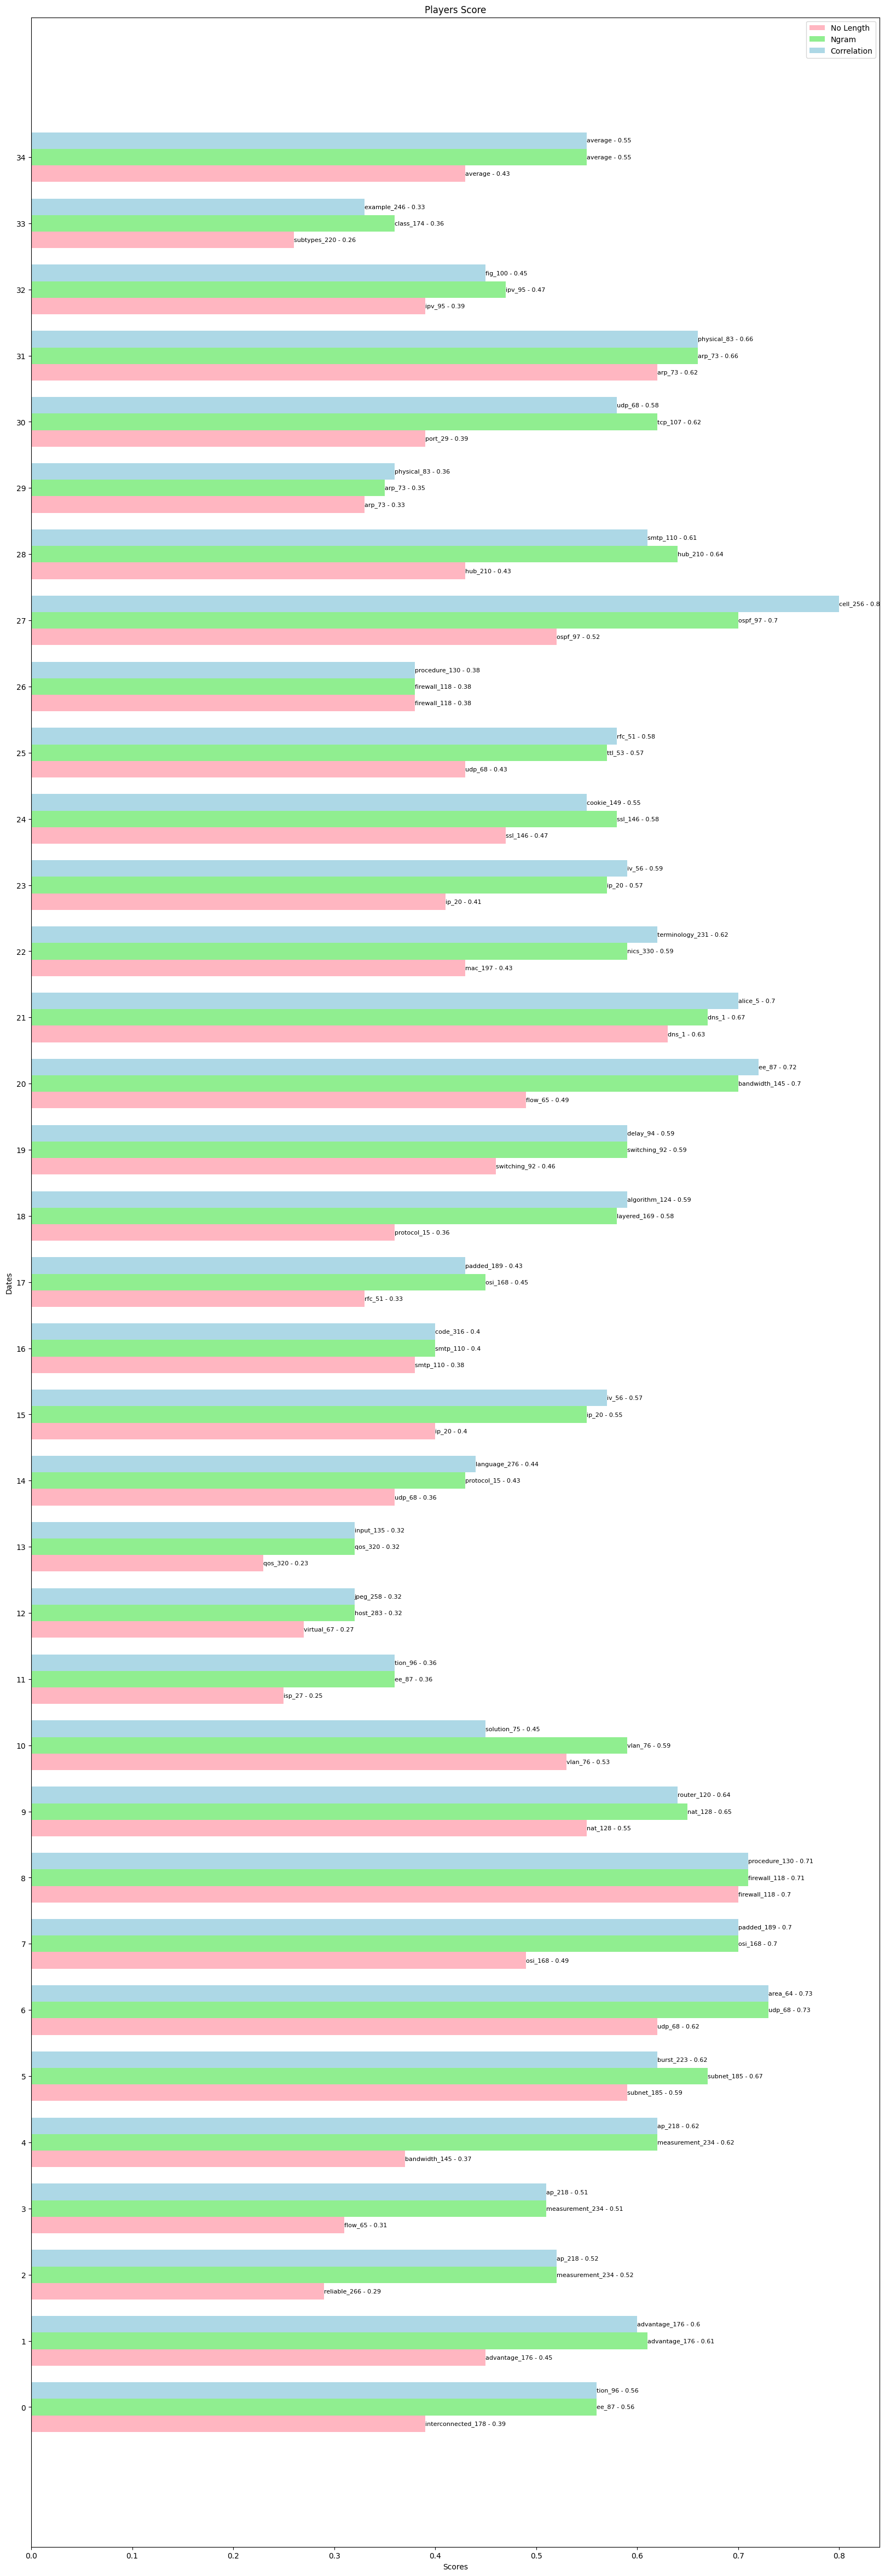

In [25]:

ind = np.arange(len(ques_list))
width = 0.25

fig = plt.figure(figsize=(20, 60))

bar1 = plt.barh(ind, no_len_probab, width, color='#FFB6C1')

bar2 = plt.barh(ind+width, ngram_probab, width, color='#90EE90')

bar3 = plt.barh(ind+width*2, corr_probab, width, color='#ADD8E6')


plt.ylabel("Dates")
plt.xlabel('Scores')
plt.title("Players Score")

plt.yticks(ind+width, [i for i in range(len(ques_list))])
# plt.yticks(ind+width, ques_list)

for i, bar in enumerate(bar1):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(no_len_topic[i]) + " - " + str(no_len_probab[i]),
             ha='left', va='center', color='black', fontsize=8)
for i, bar in enumerate(bar2):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(ngram_topic[i]) + " - " + str(ngram_probab[i]),
             ha='left', va='center', color='black', fontsize=8)
for i, bar in enumerate(bar3):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(corr_topic[i]) + " - " + str(corr_probab[i]),
             ha='left', va='center', color='black', fontsize=8)

plt.legend((bar1, bar2, bar3), ('No Length', 'Ngram', 'Correlation'))
plt.show()